In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder,MinMaxScaler,StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor ,RandomForestRegressor ,GradientBoostingRegressor
#from xgboost import XGBClassifier 
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import Ridge,Lasso
import warnings
warnings.filterwarnings('ignore')
from scipy.stats.mstats import winsorize
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
pd.set_option('display.max_columns',None)

In [107]:
from xgboost import XGBRegressor

ModuleNotFoundError: No module named 'xgboost'

In [156]:
df = pd.read_csv('Train.csv')
df_test = pd.read_csv('Test.csv')

In [157]:
df.head()

,ID,account_type,gender,age,region_code,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,cc_count_jun,dc_count_apr,dc_count_may,dc_count_jun,card_lim,personal_loan_active,vehicle_loan_active,personal_loan_closed,vehicle_loan_closed,investment_1,investment_2,investment_3,investment_4,debit_amount_apr,credit_amount_apr,debit_count_apr,credit_count_apr,max_credit_amount_apr,debit_amount_may,credit_amount_may,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,loan_enq,emi_active,cc_cons
0,12554,current,M,35,708,24893.00,378.00,10288.00,29664.00,16291.40,11432.00,2.0,26.0,10.0,48.0,14.0,47.0,430000.0,1.0,1.0,1.0,1.0,593.20,1244.14,787.0,6885.0,85919.48,25192.00,24.0,6.0,25296.0,11527.50,191777.13,2.0,40.0,24563.0,30051.32,12761.0,2.0,65.0,50836.0,Y,1674.09,20014.0
1,17645,current,M,35,123,18941.62,966.00,20672.00,287.00,4217.00,885.00,1.0,7.0,13.0,3.0,21.0,31.0,127500.0,1.0,1.0,1.0,1.0,213557.15,172678.56,90525.0,1500.0,12255.75,88693.37,35.0,36.0,80750.0,92276.57,71162.00,2.0,78.0,23948.0,42119.05,76206.0,21.0,63.0,23226.0,Y,13043.34,10173.0
2,7604,current,M,55,802,5678.87,2724.00,1964.50,3933.11,23956.25,5168.00,43.0,32.0,102.0,4.0,1.0,80.0,199999.0,1.0,1.0,1.0,1.0,165907.57,470000.00,25524.0,3735.0,34193.00,84880.00,72.0,9.0,38466.0,19343.00,70978.00,2.0,82.0,10752.0,58373.25,75283.0,7.0,1.0,27036.0,Y,25375.27,16095.0
3,1590,current,F,29,867,30489.50,1236.00,12609.88,9138.14,17521.00,13650.30,53.0,1.0,50.0,1.0,1.0,10.0,155000.0,1.0,1.0,1.0,1.0,81872.65,223379.40,48500.0,-4679.0,11558.23,236326.00,43.0,30.0,52732.0,43867.91,63033.84,23.0,38.0,12607.0,69851.51,68708.0,21.0,83.0,43037.0,Y,3544.33,7707.0
4,16556,current,M,34,802,7441.40,6906.04,4364.00,1939.00,2121.00,6829.18,67.0,47.0,82.0,54.0,16.0,68.0,297000.0,1.0,1.0,1.0,1.0,568.80,385000.00,183999.0,6916.0,17022.81,58897.03,46.0,36.0,19613.0,153253.71,30286.00,24.0,50.0,25213.0,10071.00,80140.0,8.0,32.0,32044.0,Y,12780.44,96408.0


In [158]:
df.drop(['personal_loan_active','personal_loan_closed','vehicle_loan_active','vehicle_loan_closed','loan_enq'],axis = 1,inplace= True)
df_test.drop(['personal_loan_active','personal_loan_closed','vehicle_loan_active','vehicle_loan_closed','loan_enq'],axis = 1,inplace= True)

In [159]:
df.set_index('ID',inplace= True)
df_test.set_index('ID',inplace= True)

In [160]:
def detect_outliers(dataframe):
    cols = list(dataframe)
    outliers = pd.DataFrame(columns=['Feature','Number of Outliers'])
    
    for column in cols:
        if column in dataframe.select_dtypes(include=np.number).columns:
            # first quartile (Q1)
            q1 = dataframe[column].quantile(0.25) 
            
            # third quartile (Q3)
            q3 = dataframe[column].quantile(0.75)
            
            # IQR
            iqr = q3 - q1
            
            fence_low = q1 - (1.5*iqr)
            fence_high = q3 + (1.5*iqr)
            outliers = outliers.append({'Feature':column,'Number of Outliers':dataframe.loc[(dataframe[column] < fence_low) | (dataframe[column] > fence_high)].shape[0]},ignore_index=True)
    return outliers



In [161]:
detect_outliers(df)

,Feature,Number of Outliers
0,age,534
1,region_code,0
2,cc_cons_apr,1217
3,dc_cons_apr,1220
4,cc_cons_may,1202
5,dc_cons_may,1248
6,cc_cons_jun,1181
7,dc_cons_jun,1366
8,cc_count_apr,883
9,cc_count_may,709


In [162]:
detect_outliers(df_test)

,Feature,Number of Outliers
0,age,172
1,region_code,0
2,cc_cons_apr,404
3,dc_cons_apr,386
4,cc_cons_may,413
5,dc_cons_may,409
6,cc_cons_jun,401
7,dc_cons_jun,488
8,cc_count_apr,298
9,cc_count_may,237


In [166]:
# Function to treat outliers 
def treat_outliers(dataframe):
    cols = list(dataframe)
    for col in cols:
        if col in dataframe.select_dtypes(include=np.number).columns:
            dataframe[col] = winsorize(dataframe[col], limits=[0.05, 0.1],inclusive=(True, True))
    
    return dataframe    


In [167]:
df = treat_outliers(df)
Outliers=detect_outliers(df)
Outliers[Outliers['Number of Outliers'] > 0]

,Feature,Number of Outliers
15,investment_1,2123
17,investment_3,1554
26,credit_count_may,2655
31,credit_count_jun,2217
35,cc_cons,3134


In [168]:
df_test = treat_outliers(df_test)
Outliers_test= detect_outliers(df_test)
Outliers_test[Outliers_test['Number of Outliers'] > 0]

,Feature,Number of Outliers
15,investment_1,662
17,investment_3,519
26,credit_count_may,953
31,credit_count_jun,740


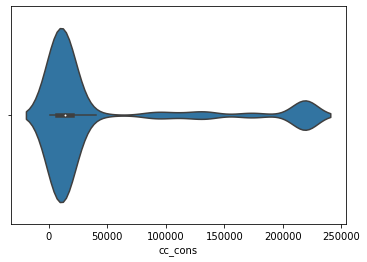

In [22]:
ax = sns.violinplot(x =df['cc_cons'], inner = 'box')

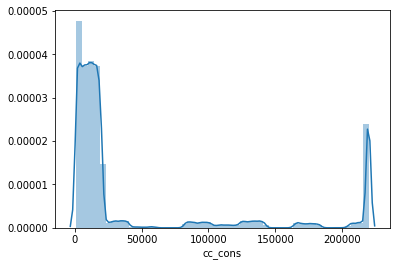

In [31]:
sns.distplot(df['cc_cons'])

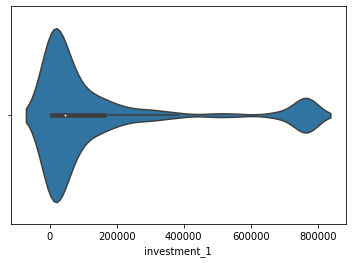

In [29]:
ax = sns.violinplot(x =df['investment_1'], inner = 'box')

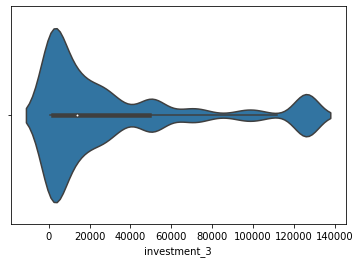

In [35]:
ax = sns.violinplot(x =df['investment_3'], inner = 'box')

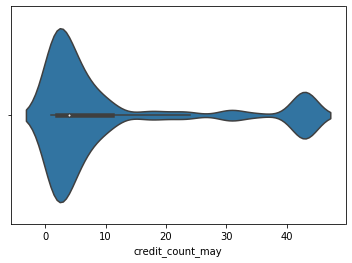

In [36]:
ax = sns.violinplot(x =df['credit_count_may'], inner = 'box')

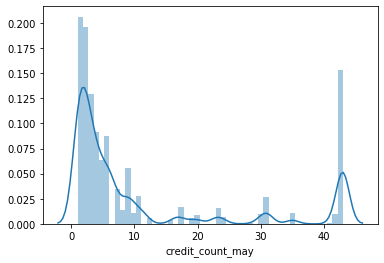

In [37]:
sns.distplot(df['credit_count_may'])

In [169]:
X=df.drop('cc_cons',axis=1)
y=df.cc_cons
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.30,random_state=42)

In [170]:
target_col ='cc_cons'

In [171]:
from scipy import stats
from scipy.stats.stats import pearsonr

In [80]:
def plot_join_plot(df, feature, target):
    j = sns.jointplot(feature, target, data = df, kind = 'reg')
    j.annotate(stats.pearsonr)
    return plt.show()

In [81]:
train_df = pd.concat([X_train, y_train], axis=1)

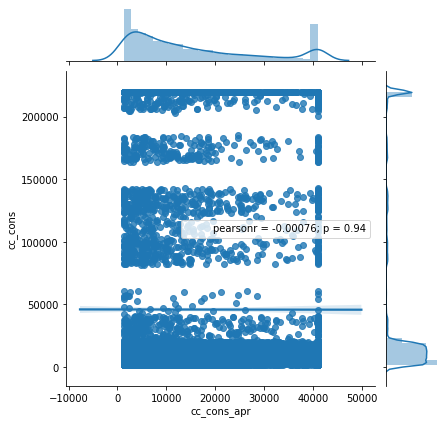

In [82]:
plot_join_plot(train_df, 'cc_cons_apr', target_col)

In [83]:
out_list = []
for column in X_train.select_dtypes(exclude ='object').columns:
    corr_tuple = pearsonr(X_train[column], y_train)
    out_list.append([column, corr_tuple[0], corr_tuple[1]])

In [84]:
corr_df = pd.DataFrame(out_list, columns=["Features", "Correlation", "P-Value"])

In [85]:
corr_df.sort_values(by=['P-Value'], inplace=True)

In [86]:
corr_df.head()

,Features,Correlation,P-Value
26,credit_count_may,0.020804,0.033029
1,region_code,-0.019178,0.049408
9,cc_count_may,0.019062,0.050799
25,credit_amount_may,-0.015488,0.112515
5,dc_cons_may,-0.014701,0.131981


In [172]:
for col in df.select_dtypes(include ='object').columns:
    le = LabelEncoder()
    X_train[col] = le.fit_transform(X_train[col])
    X_test[col] = le.transform(X_test[col])
    df_test[col] = le.transform(df_test[col])

In [179]:
X_train.head()

,account_type,gender,age,region_code,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,cc_count_jun,dc_count_apr,dc_count_may,dc_count_jun,card_lim,investment_1,investment_2,investment_3,investment_4,debit_amount_apr,credit_amount_apr,debit_count_apr,credit_count_apr,max_credit_amount_apr,debit_amount_may,credit_amount_may,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,emi_active
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
18090,0,1,53,743,5374.37,1181.6,5972.20,7419.85,27043.49,2160.00,6.0,8.0,23.0,30.0,44.0,5.0,352000.0,766011.5,343342.90,126001.0,5730.0,93484.24,42200.00,52.0,4.0,77595.00,136301.61,119671.00,3.0,82.0,14304.0,7196.50,33892.88,3.0,32.0,49000.25,13511.62
1728,0,1,62,269,37990.91,8087.0,5282.95,16077.96,4938.09,566.00,25.0,83.0,85.0,1.0,44.0,5.0,70000.0,270.0,376694.91,1374.0,1992.0,42684.00,18296.00,4.0,1.0,11150.00,51996.46,44508.00,3.0,82.0,14766.0,32012.41,92494.00,6.0,7.0,62771.79,2566.83
6233,1,1,28,394,40995.00,3106.0,1137.20,2155.00,833.00,877.00,25.0,18.0,48.0,17.0,44.0,54.0,402000.0,4720.0,273221.00,19176.0,4063.0,5109.25,142314.00,5.0,7.0,16594.00,45869.85,30477.36,1.0,24.0,47353.0,41973.58,157502.00,47.0,38.0,52651.00,1086.13
1621,0,1,34,866,18376.40,4843.0,8559.50,14486.00,7633.00,887.00,6.0,2.0,35.0,2.0,44.0,5.0,522000.0,766011.5,221000.00,12337.0,12415.0,25309.00,154070.50,52.0,35.0,50960.95,40870.00,80886.00,12.0,20.0,16433.0,130499.74,24119.81,15.0,38.0,40944.00,262.93
2435,1,0,42,801,40995.00,2846.6,9044.20,16077.96,27043.49,1129.52,8.0,5.0,6.0,50.0,25.0,47.0,202500.0,306961.5,1631.11,12337.0,553.0,139201.89,27445.77,11.0,6.0,12871.00,13337.00,172336.00,43.0,7.0,56000.0,20485.12,33766.00,49.0,83.0,50201.00,19817.94


In [93]:
from sklearn.feature_selection import SelectKBest, chi2,f_regression

In [94]:
select_feature = SelectKBest(f_regression, k=5).fit(X_train, y_train)

In [97]:
selected_features_df = pd.DataFrame({'Feature':list(X_train.columns),
                                     'Scores':select_feature.scores_})
selected_features_df.sort_values(by='Scores', ascending=False).head()

,Feature,Scores
28,credit_count_may,4.545486
3,region_code,3.862347
11,cc_count_may,3.815772
1,gender,3.155987
27,credit_amount_may,2.518956


In [98]:
x_train_f = select_feature.transform(X_train)
x_test_f = select_feature.transform(X_test)
df_test_f = select_feature.transform(df_test)

In [100]:
clf_linear = LinearRegression() 
linear_f_regress_model = clf_linear.fit(x_train_f,y_train)

In [103]:
linear_f_regress_pred = clf_linear.predict(x_test_f) 

In [126]:
def rmsle(actual_column, predicted_column):
    sum=0.0
    for x,y in zip(actual_column,predicted_column):
        if x<0 or y<0: #check for negative values. 
            continue
        p = np.log(y+1)
        r = np.log(x+1)
        sum = sum + (p - r)**2
    return (sum/len(predicted_column))**0.5

In [105]:
rmsle(y_test,linear_f_regress_pred)

1.7945394686669398

In [106]:
linear_submission__pred = clf_linear.predict(df_test_f) 

In [180]:
def feature_selection(predictors,target,number_of_features,model):

    models = model()
    rfe = RFE(models,number_of_features)
    rfe = rfe.fit(predictors,target)
    feature_ranking = pd.Series(rfe.ranking_, index=X.columns)
    plt.show()
    print('Features  to be selected for {} are:'.format(str(i[0])))
    print(feature_ranking[feature_ranking.values==1].index.tolist())
    print('===='*30)

# Choosing the models. If you want to specify additional models, kindly specify them as a key-value pair as shown below.
models = {'Linear Regression':LinearRegression,'Random Forest':RandomForestRegressor}

# Selecting 8 number of features
for i in models.items():
    feature_selection(X_train,y_train,8,i[1])

Features  to be selected for Linear Regression are:
['account_type', 'gender', 'cc_count_may', 'dc_count_apr', 'debit_count_apr', 'credit_count_may', 'debit_count_may', 'credit_count_jun']
Features  to be selected for Random Forest are:
['dc_cons_apr', 'dc_cons_may', 'debit_amount_apr', 'debit_amount_may', 'credit_amount_may', 'max_credit_amount_may', 'debit_amount_jun', 'credit_amount_jun']


In [ ]:
X_train_Features = 